<a href="https://colab.research.google.com/github/sanikak1910/Machine_Learning/blob/main/Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thompson Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('/content/Ads_CTR_Optimisation.csv')

In [3]:
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


Implementing UCB

In [4]:
import random

In [5]:
N = 10000 # no of users
# N = 500
d = 10    # no of adds
ads_selected = []
no_of_rewards_0 = [0] * d
no_of_rewards_1 = [0] * d
total_reward = 0

In [6]:
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0,d):
    random_beta = random.betavariate(no_of_rewards_1[i] + 1, no_of_rewards_0[i]+1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = df.values[n, ad]
  if reward == 1:
    no_of_rewards_1[ad] = no_of_rewards_1[ad] + 1
  else:
    no_of_rewards_0[ad] = no_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

Visualizing the results

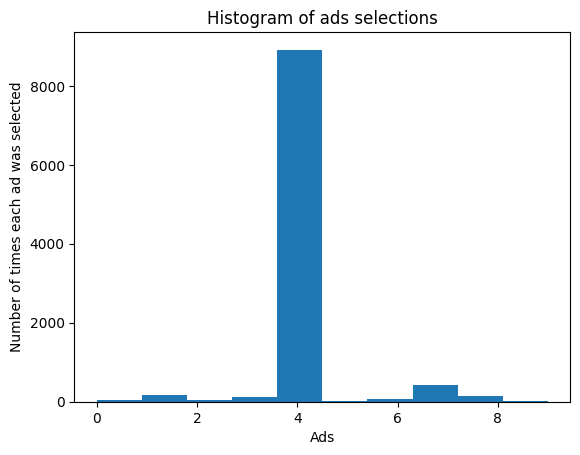

In [7]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()